In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


Check paths

In [2]:
HOME = os.getcwd()
print('HOME: ', HOME)

SHOPPING_TREND_DATASET = os.path.join(HOME, r'data\shopping_trends.csv')
print('DATASET: ', SHOPPING_TREND_DATASET)

HOME:  d:\Data Science Programming\External_Projects\Shopping Trend Statistics
DATASET:  d:\Data Science Programming\External_Projects\Shopping Trend Statistics\data\shopping_trends.csv


Loading and understand dataset

In [3]:
shopping_trend_df = pd.read_csv(SHOPPING_TREND_DATASET)
shopping_trend_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [4]:
shopping_trend_df.shape

(3900, 19)

In [5]:
shopping_trend_df['Age'].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

The age distribution in this dataset appears to be fairly balanced, with a mean age of approximately 44 years. The dataset includes a wide range of ages, from a minimum of 18 years to a maximum of 70 years. About 50% of individuals are between 31 and 57 years old, with the median and mean both around 44 years, indicating that the ages are relatively evenly spread out. The standard deviation of 15.21 years suggests moderate variability, meaning that while most individuals are around the middle age range, there are some younger and older individuals as well. Overall, the age distribution seems diverse, but not heavily skewed.

In [6]:
top_5_buy_age = shopping_trend_df['Age'].value_counts().head()
top_5_buy_age

Age
69    88
57    87
41    86
25    85
49    84
Name: count, dtype: int64

The age distribution in this subset shows that the most frequent ages are 69, 57, 41, 25, and 49, each occurring between 84 and 88 times. This indicates that these particular ages are more common in the dataset. While the dataset includes a variety of ages, there is a concentration around these specific values, which might suggest certain age groups are overrepresented compared to others.

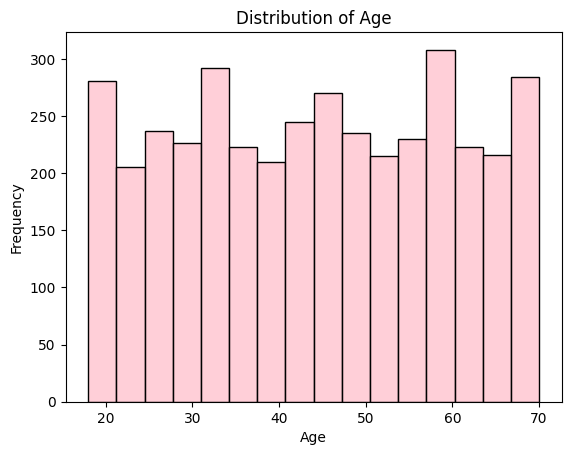

In [7]:
sns.histplot(shopping_trend_df['Age'], color='pink')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [8]:
shopping_trend_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

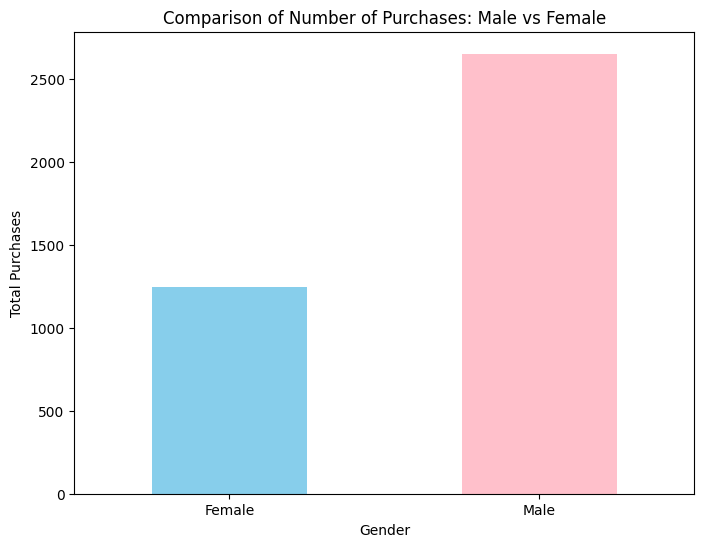

In [9]:
gender_purchase_count = shopping_trend_df.groupby('Gender')['Customer ID'].value_counts()

gender_purchase_count_summary = gender_purchase_count.groupby('Gender').sum()

plt.figure(figsize=(8, 6))
gender_purchase_count_summary.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Comparison of Number of Purchases: Male vs Female')
plt.xlabel('Gender')
plt.ylabel('Total Purchases')
plt.xticks(rotation=0)
plt.show()

This plot indicate male buy twice as much as female. (WTF @@)

In [10]:
shopping_trend_df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_22012\662297067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='plasma')


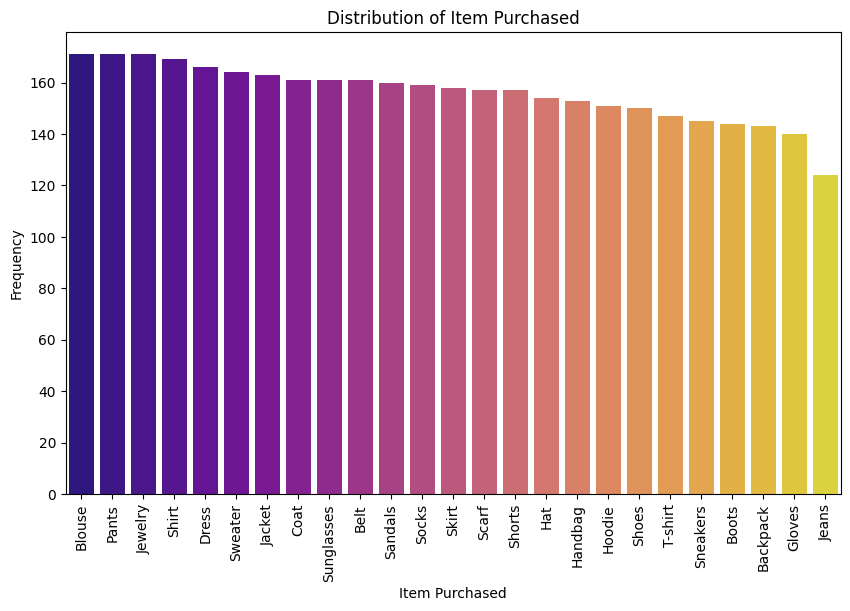

In [11]:
item_counts = shopping_trend_df['Item Purchased'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette='plasma')
plt.title('Distribution of Item Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [12]:
shopping_trend_df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_22012\3372936017.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


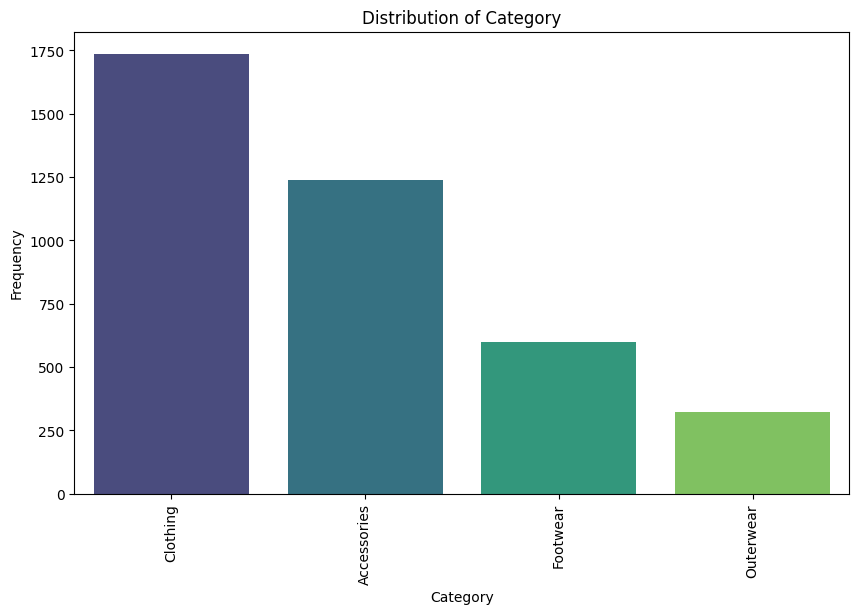

In [13]:
category_counts = shopping_trend_df['Category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

The plot indicates the most people buy Clothing more than something else

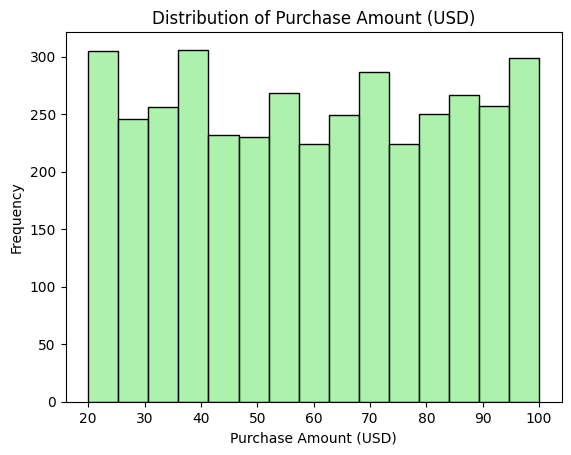

In [14]:
sns.histplot(shopping_trend_df['Purchase Amount (USD)'], color='lightgreen')
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

In [15]:
shopping_trend_df['Size'].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_22012\2372290663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_distribute.index, y=size_distribute.values, palette='plasma')


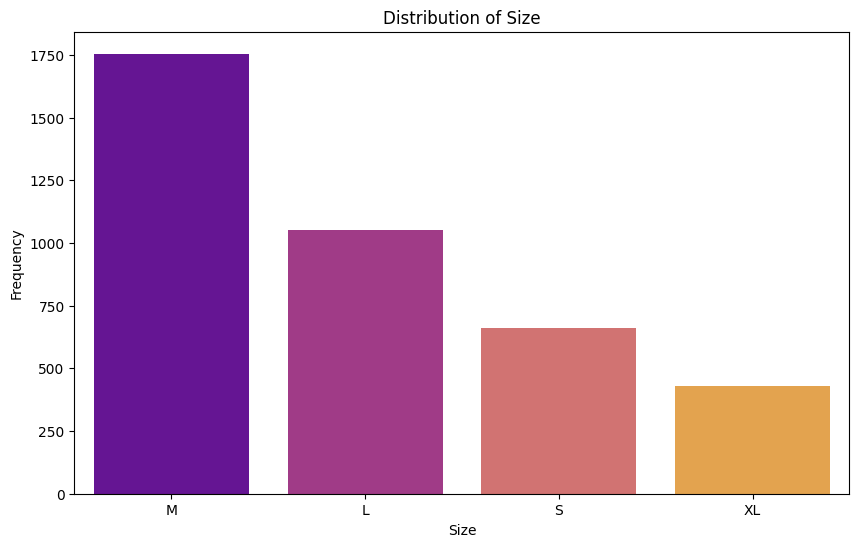

In [16]:
size_distribute = shopping_trend_df['Size'].value_counts()

# Vẽ biểu đồ thanh với matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=size_distribute.index, y=size_distribute.values, palette='plasma')
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

In [17]:
shopping_trend_df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_22012\2637583251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_distribute.index, y=color_distribute.values, palette='viridis')


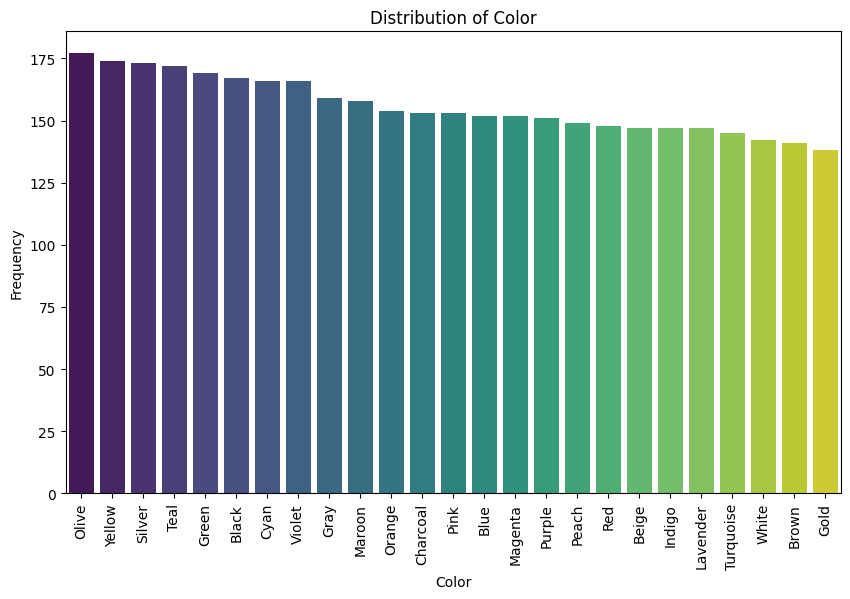

In [18]:
color_distribute = shopping_trend_df['Color'].value_counts()

# Vẽ biểu đồ thanh với matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=color_distribute.index, y=color_distribute.values, palette='viridis')
plt.title('Distribution of Color')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_22012\715573205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_distribute.index, y=season_distribute.values, palette='plasma')


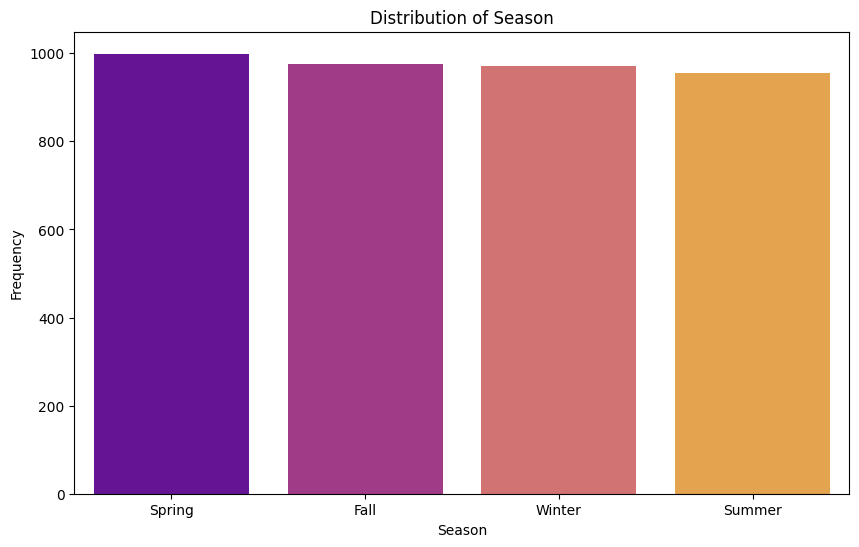

In [19]:
season_distribute = shopping_trend_df['Season'].value_counts()

# Vẽ biểu đồ thanh với matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=season_distribute.index, y=season_distribute.values, palette='plasma')
plt.title('Distribution of Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()

In [20]:
shopping_trend_df['Payment Method'].unique()

array(['Credit Card', 'Bank Transfer', 'Cash', 'PayPal', 'Venmo',
       'Debit Card'], dtype=object)

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_22012\4091529344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_distribute.index, y=payment_method_distribute.values, palette='viridis')


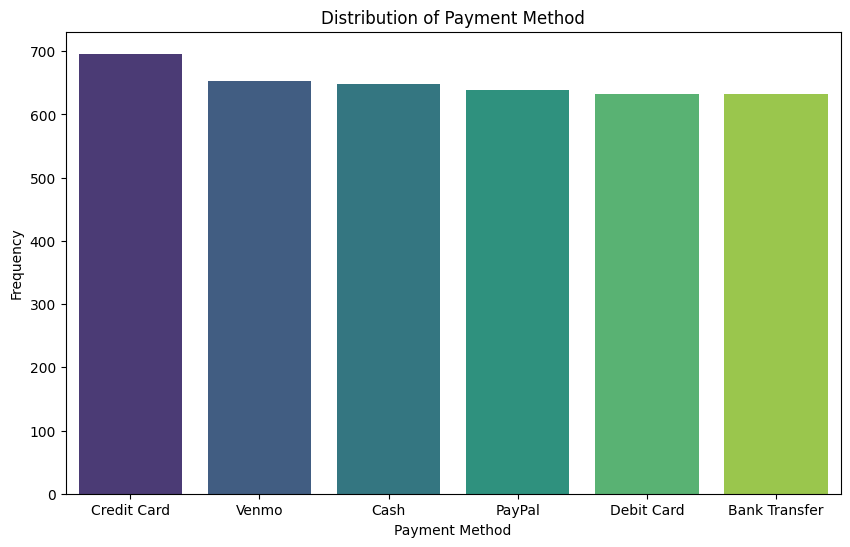

In [21]:
payment_method_distribute = shopping_trend_df['Payment Method'].value_counts()

# Vẽ biểu đồ thanh với matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_distribute.index, y=payment_method_distribute.values, palette='viridis')
plt.title('Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.show()

In [22]:
shopping_trend_df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_22012\3145354958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_of_purchases_distribute.index, y=frequency_of_purchases_distribute.values, palette='plasma')


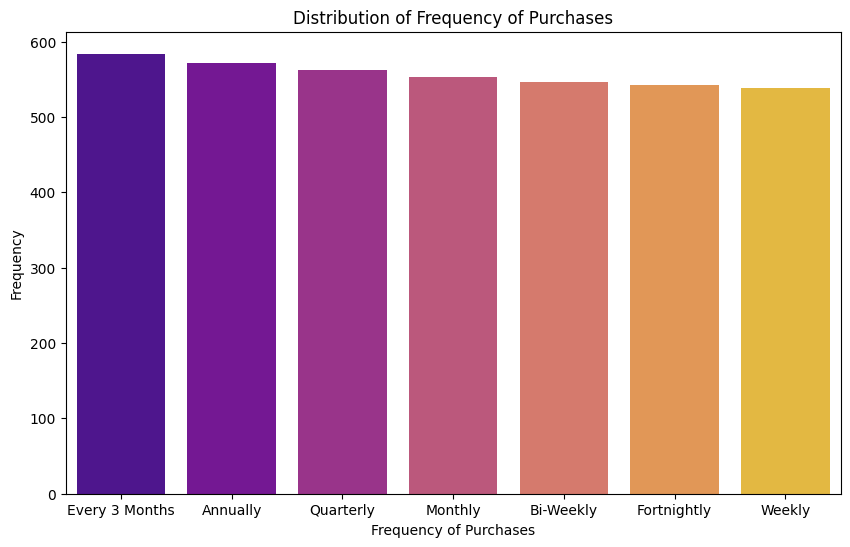

In [23]:
frequency_of_purchases_distribute = shopping_trend_df['Frequency of Purchases'].value_counts()

# Vẽ biểu đồ thanh với matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency_of_purchases_distribute.index, y=frequency_of_purchases_distribute.values, palette='plasma')
plt.title('Distribution of Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Frequency')
plt.show()

In [24]:
shopping_trend_df.keys()

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [25]:
# Age, Gender, Location, Purchase Amount (USD), Preferred Payment Method, Previous Purchases, Frequency of Purchases, Discount Applied, Promo Code Used, Subscription Status.

feature_df = shopping_trend_df.drop(columns=['Customer ID', 'Item Purchased', 'Category', 'Size', 'Color', 'Season', 'Review Rating', 'Payment Method', 'Shipping Type'])
feature_df.keys()

Index(['Age', 'Gender', 'Purchase Amount (USD)', 'Location',
       'Subscription Status', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [26]:
label_encoder = LabelEncoder()

# Encoding for columns
feature_df['Gender'] = label_encoder.fit_transform(feature_df['Gender'])
feature_df['Location'] = label_encoder.fit_transform(feature_df['Location'])
feature_df['Preferred Payment Method'] = label_encoder.fit_transform(feature_df['Preferred Payment Method'])
feature_df['Subscription Status'] = label_encoder.fit_transform(feature_df['Subscription Status'])
feature_df['Promo Code Used'] = label_encoder.fit_transform(feature_df['Promo Code Used'])
feature_df['Discount Applied'] = label_encoder.fit_transform(feature_df['Discount Applied'])
feature_df['Frequency of Purchases'] = label_encoder.fit_transform(feature_df['Frequency of Purchases'])

feature_df

,Age,Gender,Purchase Amount (USD),Location,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,1,53,16,1,1,1,14,5,3
1,19,1,64,18,1,1,1,2,1,3
2,50,1,73,20,1,1,1,23,2,6
3,21,1,90,38,1,1,1,49,4,6
4,45,1,49,36,1,1,1,31,4,0
...,...,...,...,...,...,...,...,...,...,...
3895,40,0,28,45,0,0,0,32,5,6
3896,52,0,49,14,0,0,0,41,0,1
3897,46,0,33,29,0,0,0,24,5,5
3898,44,0,77,22,0,0,0,24,5,6


In [27]:
print("\nLabelEncoder mapping:\n", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


LabelEncoder mapping:
 {'Annually': np.int64(0), 'Bi-Weekly': np.int64(1), 'Every 3 Months': np.int64(2), 'Fortnightly': np.int64(3), 'Monthly': np.int64(4), 'Quarterly': np.int64(5), 'Weekly': np.int64(6)}


In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature_df)

In [29]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Giả sử chúng ta muốn chia thành 3 nhóm
feature_df['Segment'] = kmeans.fit_predict(scaled_data)
print("\nData after clustering:\n", feature_df)


Data after clustering:
       Age  Gender  Purchase Amount (USD)  Location  Subscription Status  \
0      55       1                     53        16                    1   
1      19       1                     64        18                    1   
2      50       1                     73        20                    1   
3      21       1                     90        38                    1   
4      45       1                     49        36                    1   
...   ...     ...                    ...       ...                  ...   
3895   40       0                     28        45                    0   
3896   52       0                     49        14                    0   
3897   46       0                     33        29                    0   
3898   44       0                     77        22                    0   
3899   52       0                     81         4                    0   

      Discount Applied  Promo Code Used  Previous Purchases  \
0          

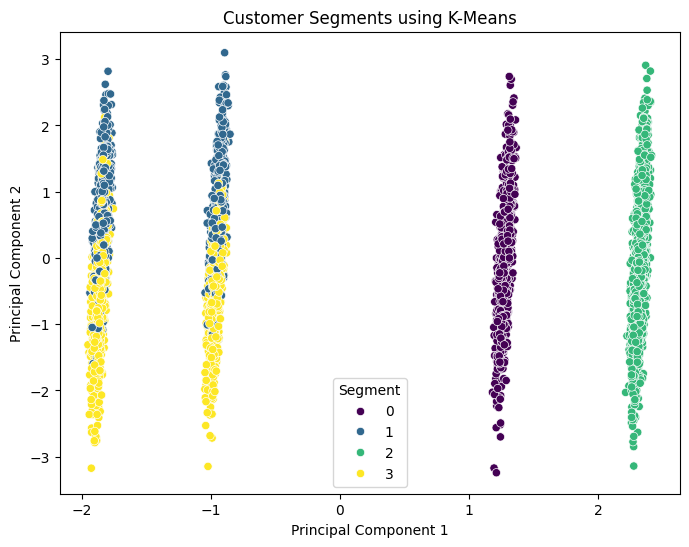

In [30]:
# 5. Visualize kết quả phân nhóm
# Sử dụng PCA để giảm chiều dữ liệu xuống 2 chiều cho dễ nhìn
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Vẽ biểu đồ phân nhóm
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=feature_df['Segment'], palette='viridis')
plt.title('Customer Segments using K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

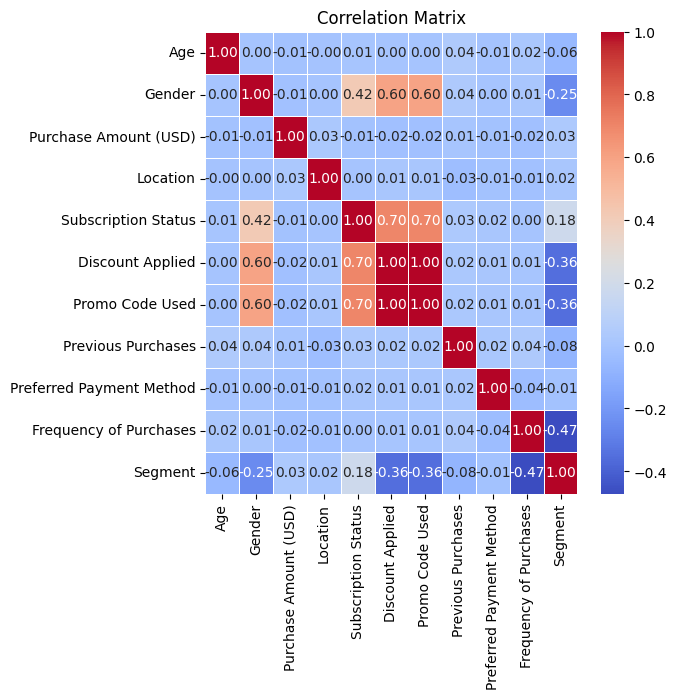

In [31]:
corr_matrix = feature_df.corr()
# Vẽ biểu đồ nhiệt của ma trận tương quan
plt.figure(figsize=(6, 6))  # Kích thước của biểu đồ
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Thêm tiêu đề
plt.title('Correlation Matrix')

# Hiển thị biểu đồ
plt.show()

This indicate segment affected by `Gender`, `Discount Applied`, `Previous Purchases`, `Frequency of Purchases`

In [32]:
grouped_median = feature_df.groupby('Segment').median()
print("Median values for each segment:\n", grouped_median)

Median values for each segment:
           Age  Gender  Purchase Amount (USD)  Location  Subscription Status  \
Segment                                                                       
0        43.0     1.0                   59.0      24.0                  0.0   
1        46.0     0.0                   59.0      23.0                  0.0   
2        45.0     1.0                   60.0      24.0                  1.0   
3        42.0     0.0                   62.0      25.0                  0.0   

         Discount Applied  Promo Code Used  Previous Purchases  \
Segment                                                          
0                     1.0              1.0                24.0   
1                     0.0              0.0                29.0   
2                     1.0              1.0                26.0   
3                     0.0              0.0                21.0   

         Preferred Payment Method  Frequency of Purchases  
Segment                            

- Frequency of Purchases
    - Segment 0: `Fortnightly`
    - Segment 1: `Quartly`
    - Segment 2: `Fortnightly`
    - Segment 3: `Bi-Weekly`
- Discount Applied & Promo Code Used
    - Segment 0: `Yes`
    - Segment 1: `No`
    - Segment 2: `Yes`
    - Segment 3: `No`
- Gender
    - Segment 0: `Male`
    - Segment 1: `Female`
    - Segment 2: `Male`
    - Segment 3: `Female`

Segment 0 -> Frequent Shoppers with Normal Purchases Subscriptions

Segment 1 -> Occasional Shoppers with High Purchases

Segment 2 -> Frequent Shoppers with High Purchases and Subscriptions

Segment 3 -> Infrequent Shoppers
 


In [33]:
labels = {
    0: "Frequent Shoppers with Normal Purchases Subscriptions",
    1: "Occasional Shoppers with High Purchases",
    2: "Frequent Shoppers with High Purchases and Subscriptions",
    3: "Infrequent Shoppers"
}

shopping_trend_df['Segment Label'] = feature_df['Segment'].map(labels)

In [34]:
shopping_trend_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Segment Label
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Frequent Shoppers with High Purchases and Subs...
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Frequent Shoppers with High Purchases and Subs...
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Frequent Shoppers with High Purchases and Subs...
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,Frequent Shoppers with High Purchases and Subs...
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,Frequent Shoppers with High Purchases and Subs...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,Occasional Shoppers with High Purchases
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Infrequent Shoppers
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,Occasional Shoppers with High Purchases
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,Occasional Shoppers with High Purchases
